<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/An%C3%A1lise_Explorat%C3%B3ria_PerfilComunidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kmodes
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d62004312cc7bc61bd23d2b8026ac0dab9762b1e1648c9cf47769f6097241cb6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

## EIXO: SOBREVIVÊNCIA/NECESSIDADES HUMANAS

In [ ]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
eixo_1 = eixo_1.loc[0:103].reset_index(drop=True)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,Perf. Comun.
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,Quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
100,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
101,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
102,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


Tratando e processando os dados

In [ ]:
eixo_1.rename(columns={'Perf. Comun.': 'perfis'}, inplace=True)

In [ ]:
eixo_1.perfis.unique()

array(['Quilombola', 'Indígena', 'Pescador', 'Urbano'], dtype=object)

In [ ]:
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfis
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,Quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
100,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
101,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
102,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
eixo_1.replace('X', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1.shape

(94, 26)

In [ ]:
eixo_1 = eixo_1.reset_index()
eixo_1

,index,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfis
0,1,5,5,3,3,3,4,5,5,3,...,2,2,4,3,3,3,3,3,3,Quilombola
1,2,5,5,5,4,5,5,5,5,2,...,3,5,5,4,3,5,5,3,3,Quilombola
2,3,4,5,4,3,4,5,5,4,3,...,1,2,2,3,5,4,3,3,4,Quilombola
3,4,5,5,3,3,5,5,5,5,3,...,1,1,3,3,5,5,3,3,3,Quilombola
4,5,4,4,3,3,4,5,4,5,3,...,3,2,2,2,3,4,3,2,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,99,5,5,4,5,5,5,4,4,4,...,4,3,5,4,5,5,4,4,5,Indígena
90,100,5,5,5,5,5,5,5,4,4,...,4,4,5,4,5,5,5,4,5,Indígena
91,101,5,5,4,5,5,5,5,5,3,...,4,3,4,4,5,5,5,3,5,Indígena
92,102,5,4,4,5,5,5,5,4,2,...,3,4,4,4,5,5,5,3,5,Indígena


<ipython-input-23-7a661ca1aafc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alimentacao_df['perfis'] = eixo_1['perfis']
<ipython-input-23-7a661ca1aafc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moradia_df['perfis'] = eixo_1['perfis']
<ipython-input-23-7a661ca1aafc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

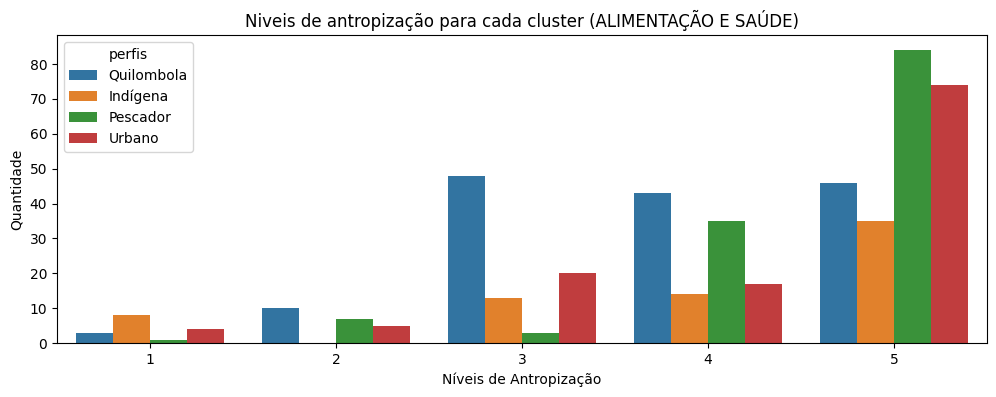

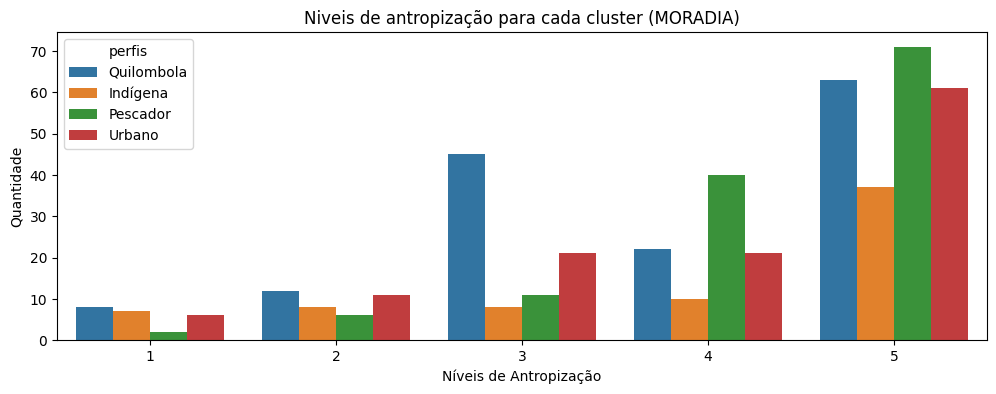

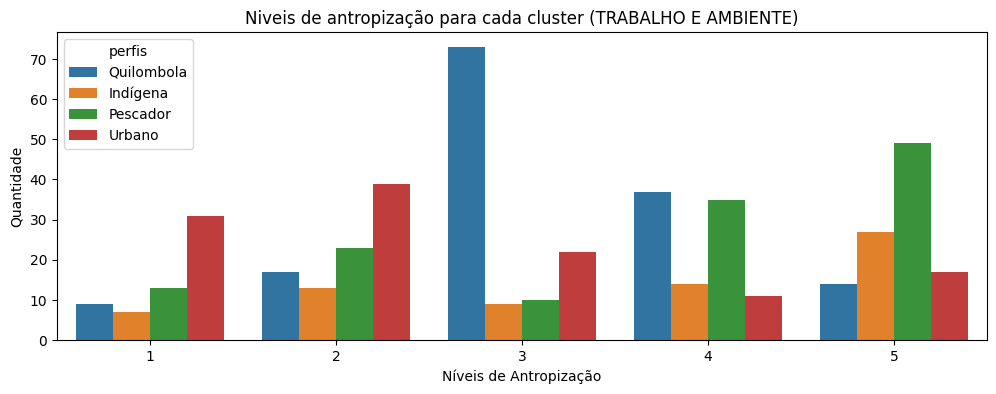

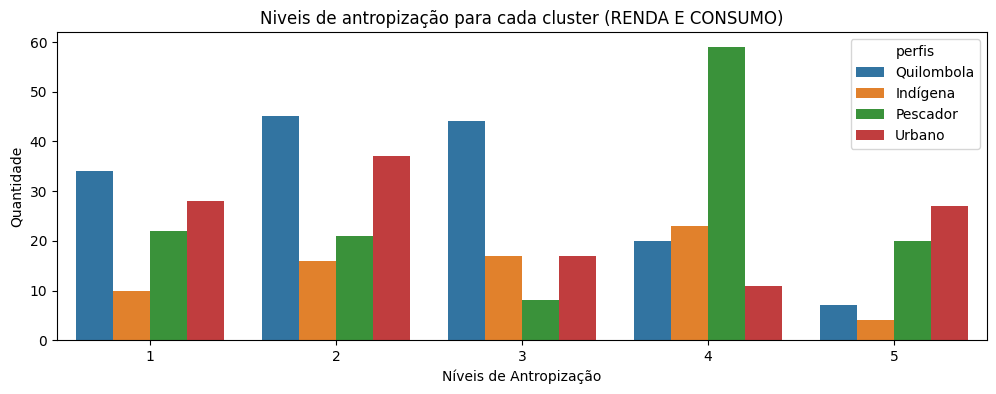

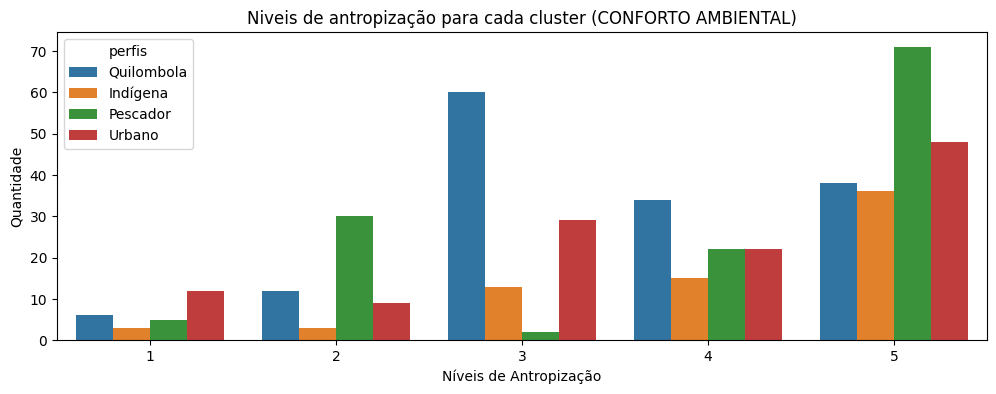

In [ ]:
alimentacao = ['P01', 'P02', 'P03', 'P04', 'P05']
alimentacao_df = eixo_1[alimentacao]
alimentacao_df['perfis'] = eixo_1['perfis']
alimentacao_df = pd.melt(alimentacao_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

moradia = ['P06', 'P07', 'P08', 'P09', 'P10']
moradia_df = eixo_1[moradia]
moradia_df['perfis'] = eixo_1['perfis']
moradia_df = pd.melt(moradia_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

trabalho = ['P11', 'P12', 'P13', 'P14', 'P15']
trabalho_df = eixo_1[trabalho]
trabalho_df['perfis'] = eixo_1['perfis']
trabalho_df = pd.melt(trabalho_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

renda_consumo = ['P16', 'P17', 'P18', 'P19', 'P20']
renda_consumo_df = eixo_1[renda_consumo]
renda_consumo_df['perfis'] = eixo_1['perfis']
renda_consumo_df = pd.melt(renda_consumo_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

conforto_ambiental = ['P21', 'P22', 'P23', 'P24', 'P25']
conforto_ambiental_df = eixo_1[conforto_ambiental]
conforto_ambiental_df['perfis'] = eixo_1['perfis']
conforto_ambiental_df = pd.melt(conforto_ambiental_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=alimentacao_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (ALIMENTAÇÃO E SAÚDE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=moradia_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (MORADIA)')

plt.figure(figsize=(12, 4))
sns.countplot(data=trabalho_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (TRABALHO E AMBIENTE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=renda_consumo_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (RENDA E CONSUMO)')

plt.figure(figsize=(12, 4))
sns.countplot(data=conforto_ambiental_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (CONFORTO AMBIENTAL)')

plt.show()

## EIXO: CONFLITOS/ CONSEQUENCIAS AMBIENTAIS

In [ ]:
eixo_2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P26", "P27", "P28", "P29", "P30", "P31", "P32", "P33", "P34", "P35", "P36", "P37", "P38", "P39", "P40", "P41", "P42", "P43", "P44", "P45", "P46", "P47", "P48", "P49", "P50", "Perf. Comun."])
eixo_2 = eixo_2.loc[0:103].reset_index(drop=True)
eixo_2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Perf. Comun.
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
100,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Indígena
101,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
102,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Indígena


In [ ]:
eixo_2.rename(columns={'Perf. Comun.': 'perfis'}, inplace=True)

In [ ]:
eixo_2.replace('X', pd.NA, inplace=True)
eixo_2.dropna(inplace=True)
eixo_2.shape

(98, 26)

In [ ]:
eixo_2 = eixo_2.reset_index()
eixo_2

,index,P26,P27,P28,P29,P30,P31,P32,P33,P34,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,perfis
0,0,3,3,1,1,4,3,5,3,4,...,2,4,5,3,3,3,5,3,3,Quilombola
1,1,3,4,4,3,4,4,4,2,4,...,5,3,5,4,4,1,5,3,3,Quilombola
2,2,4,3,4,3,3,4,3,2,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,3,4,3,4,2,2,4,4,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,4,3,3,5,1,3,5,5,3,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,99,5,5,5,5,4,5,5,4,4,...,3,5,5,4,5,2,5,5,5,Indígena
94,100,5,5,5,5,3,5,5,4,5,...,3,5,5,4,5,2,5,5,4,Indígena
95,101,5,5,5,4,3,5,5,3,4,...,3,5,5,4,5,2,5,5,5,Indígena
96,102,5,5,5,5,3,5,5,3,4,...,2,5,5,5,5,2,5,5,5,Indígena


<ipython-input-40-402a9b8edbda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioindicadores_df['perfis'] = eixo_2['perfis']
<ipython-input-40-402a9b8edbda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoindicadores_df['perfis'] = eixo_2['perfis']
<ipython-input-40-402a9b8edbda>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

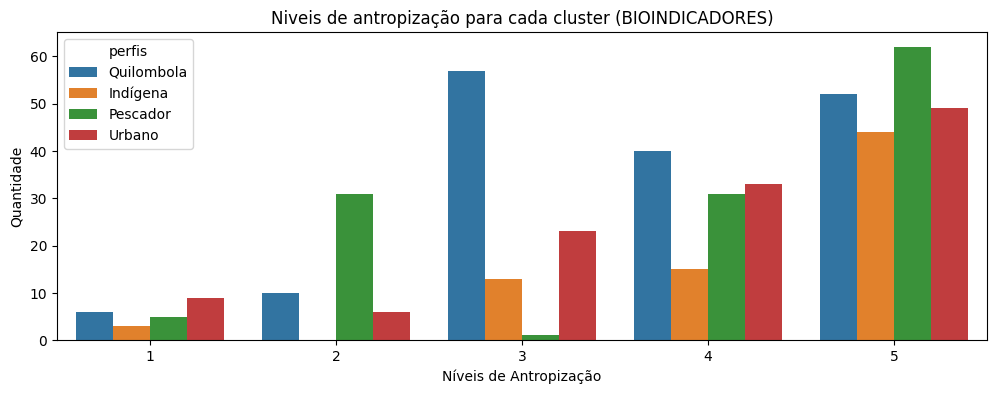

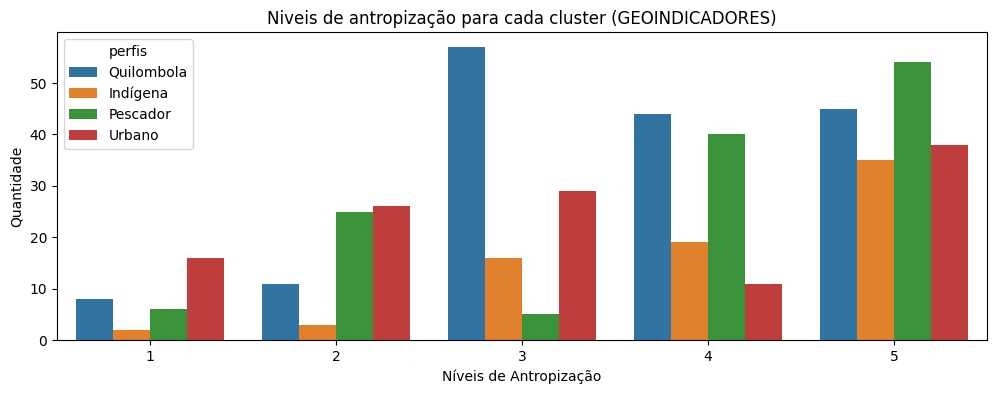

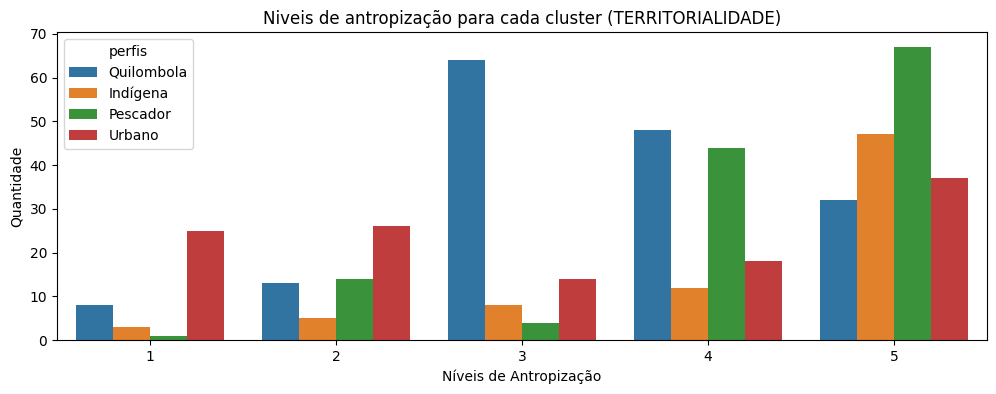

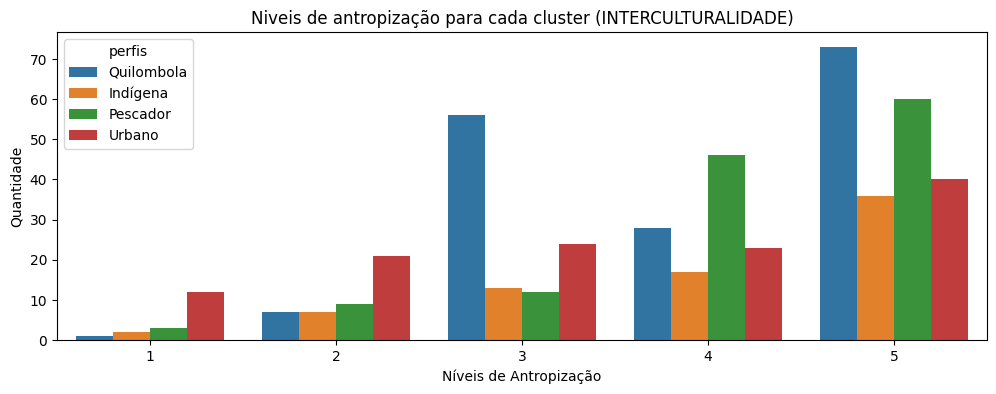

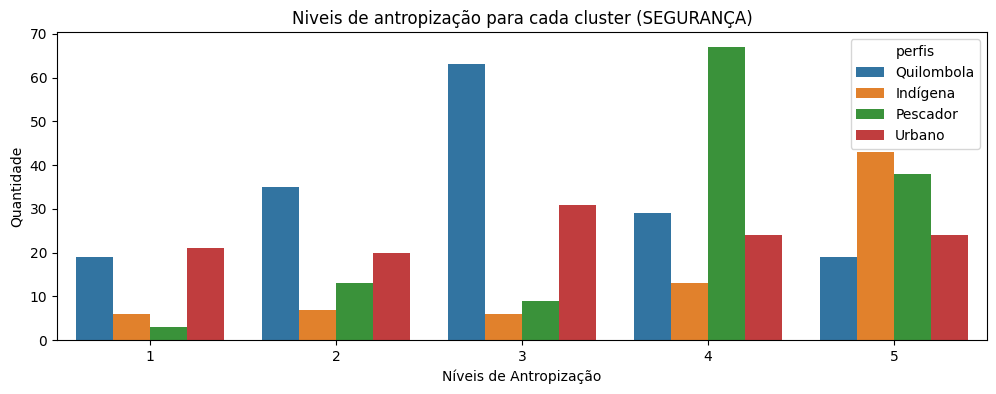

In [ ]:
bioindicadores = ['P26', 'P27', 'P28', 'P29', 'P30']
bioindicadores_df = eixo_2[bioindicadores]
bioindicadores_df['perfis'] = eixo_2['perfis']
bioindicadores_df = pd.melt(bioindicadores_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

geoindicadores = ['P31', 'P32', 'P33', 'P34', 'P35']
geoindicadores_df = eixo_2[geoindicadores]
geoindicadores_df['perfis'] = eixo_2['perfis']
geoindicadores_df = pd.melt(geoindicadores_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

territorialidade = ['P36', 'P37', 'P38', 'P39', 'P40']
territorialidade_df = eixo_2[territorialidade]
territorialidade_df['perfis'] = eixo_2['perfis']
territorialidade_df = pd.melt(territorialidade_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

interculturalidade = ['P41', 'P42', 'P43', 'P44', 'P45']
interculturalidade_df = eixo_2[interculturalidade]
interculturalidade_df['perfis'] = eixo_2['perfis']
interculturalidade_df = pd.melt(interculturalidade_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

seguranca = ['P46', 'P47', 'P48', 'P49', 'P50']
seguranca_df = eixo_2[seguranca]
seguranca_df['perfis'] = eixo_2['perfis']
seguranca_df = pd.melt(seguranca_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=bioindicadores_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (BIOINDICADORES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=geoindicadores_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GEOINDICADORES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=territorialidade_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (TERRITORIALIDADE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=interculturalidade_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (INTERCULTURALIDADE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=seguranca_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (SEGURANÇA)')

plt.show()

##Eixo SUSTENTABILIDADE/BOM VIVER - perguntas 51 a 75

Diversidade Cultural - perguntas 51 a 55

Garantia de Direitos - perguntas 56 a 60

Economia Circular - perguntas 61 a 65

Diálogo de Saberes - perguntas 66 a 70

Gestão do Território - perguntas 71 a 75

In [ ]:
eixo_3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P51", "P52", "P53", "P54", "P55", "P56", "P57", "P58", "P59", "P60", "P61", "P62", "P63", "P64", "P65", "P66", "P67", "P68", "P69", "P70", "P71", "P72", "P73", "P74", "P75", "Perf. Comun."])
eixo_3 = eixo_3.loc[0:103].reset_index(drop=True)
eixo_3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,Perf. Comun.
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,Quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,Quilombola
2,5,3,4,5,X,3,5,3,2,2,...,1,2,2,3,3,4,3,3,2,Quilombola
3,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,Quilombola
4,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,4,5,5,5,5,5,4,5,3,...,3,5,5,5,5,5,5,5,4,Indígena
100,5,5,5,5,5,5,5,4,5,4,...,3,5,5,5,5,5,5,5,3,Indígena
101,5,5,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena
102,5,4,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena


In [ ]:
eixo_3.rename(columns={'Perf. Comun.': 'perfis'}, inplace=True)

In [ ]:
eixo_3.replace('X', pd.NA, inplace=True)
eixo_3.dropna(inplace=True)
eixo_3.shape

(97, 26)

In [ ]:
eixo_3 = eixo_3.reset_index()
eixo_3

,index,P51,P52,P53,P54,P55,P56,P57,P58,P59,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,perfis
0,0,3,3,4,4,4,3,3,2,3,...,3,3,3,3,3,5,3,2,4,Quilombola
1,1,4,5,5,5,4,4,5,3,3,...,3,4,2,2,2,5,3,4,3,Quilombola
2,3,2,3,4,4,4,3,4,3,3,...,3,2,3,4,2,1,3,3,3,Quilombola
3,4,5,5,5,1,5,5,5,5,3,...,5,5,5,3,5,5,5,5,3,Quilombola
4,5,5,3,3,5,4,3,4,3,3,...,3,4,3,4,3,4,3,3,4,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,99,5,4,5,5,5,5,5,4,5,...,3,5,5,5,5,5,5,5,4,Indígena
93,100,5,5,5,5,5,5,5,4,5,...,3,5,5,5,5,5,5,5,3,Indígena
94,101,5,5,5,5,5,5,5,4,5,...,3,5,5,5,5,5,5,5,3,Indígena
95,102,5,4,5,5,5,5,5,4,5,...,3,5,5,5,5,5,5,5,3,Indígena


<ipython-input-8-eead623aa547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diversidade_cultural_df['perfis'] = eixo_3['perfis']
<ipython-input-8-eead623aa547>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garantia_direitos_df['perfis'] = eixo_3['perfis']
<ipython-input-8-eead623aa547>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

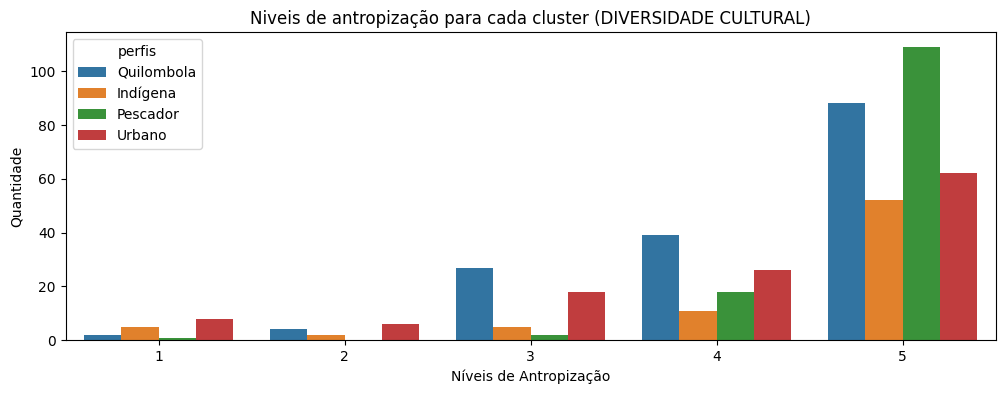

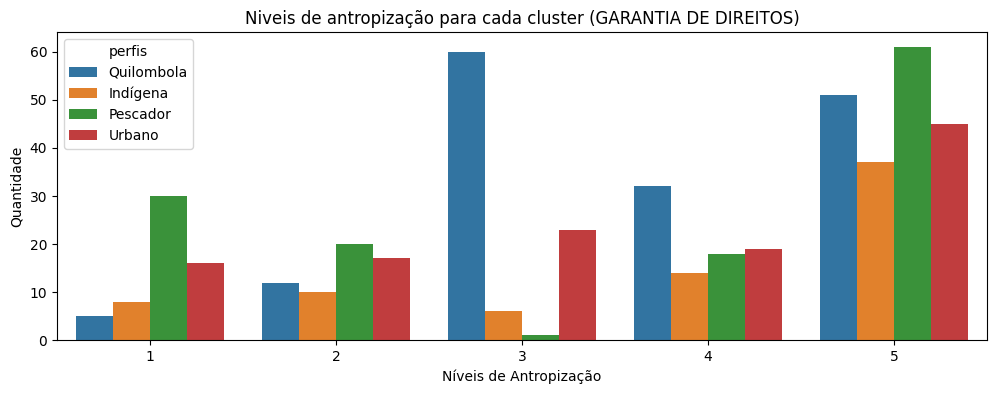

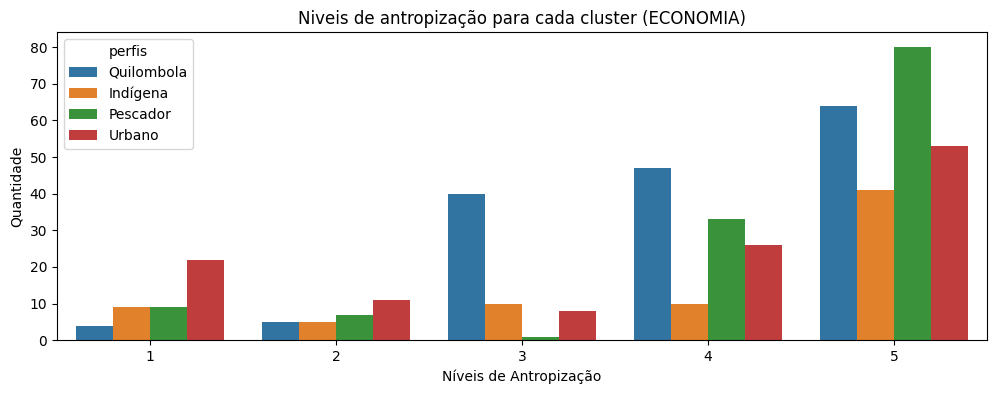

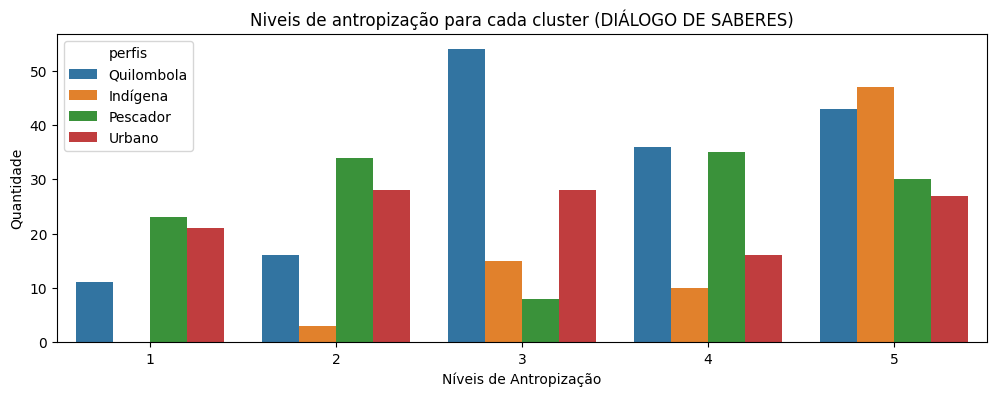

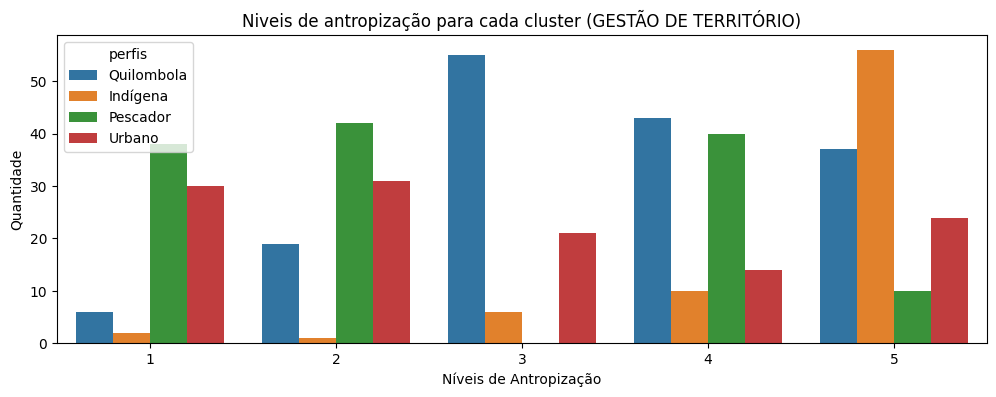

In [ ]:
diversidade_cultural = ['P51', 'P52', 'P53', 'P54', 'P55']
diversidade_cultural_df = eixo_3[diversidade_cultural]
diversidade_cultural_df['perfis'] = eixo_3['perfis']
diversidade_cultural_df = pd.melt(diversidade_cultural_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

garantia_direitos = ['P56', 'P57', 'P58', 'P59', 'P60']
garantia_direitos_df = eixo_3[garantia_direitos]
garantia_direitos_df['perfis'] = eixo_3['perfis']
garantia_direitos_df = pd.melt(garantia_direitos_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

economia = ['P61', 'P62', 'P63', 'P64', 'P65']
economia_df = eixo_3[economia]
economia_df['perfis'] = eixo_3['perfis']
economia_df = pd.melt(economia_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

dialogo_saberes = ['P66', 'P67', 'P68', 'P69', 'P70']
dialogo_saberes_df = eixo_3[dialogo_saberes]
dialogo_saberes_df['perfis'] = eixo_3['perfis']
dialogo_saberes_df = pd.melt(dialogo_saberes_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

gestao_territorio = ['P71', 'P72', 'P73', 'P74', 'P75']
gestao_territorio_df = eixo_3[gestao_territorio]
gestao_territorio_df['perfis'] = eixo_3['perfis']
gestao_territorio_df = pd.melt(gestao_territorio_df, id_vars=['perfis'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=diversidade_cultural_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (DIVERSIDADE CULTURAL)')

plt.figure(figsize=(12, 4))
sns.countplot(data=garantia_direitos_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GARANTIA DE DIREITOS)')

plt.figure(figsize=(12, 4))
sns.countplot(data=economia_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (ECONOMIA)')

plt.figure(figsize=(12, 4))
sns.countplot(data=dialogo_saberes_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (DIÁLOGO DE SABERES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=gestao_territorio_df, x='Valores', hue='perfis')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GESTÃO DE TERRITÓRIO)')

plt.show()

**Clusterização não é uma boa iniciativa** -> não é encontrado um agrupamento bom ou um padrão de resposta entre as comunidades

**Pelas pontuações** -> Os dados são muito dispersos também

**Ideias**:
  - Criar algo tipo de critério ou peso pra cada pergunta a analisar os dados em cima delas, isso a partir de uma amostra de dados, as quais são mais relevantes pro estudo
  - Fazer uma nova clusterização em cima dos perfis das comunidades

Suponha que eu tenha uma base de dados que contém o resultado de um questionário aplicado a comunidades de origem amazônica, sendo elas: Curiau, Oipoque, São caetano, Santarém, Amazonas e Tembé. O questionário contém 25 perguntas, que corresponde a um único eixo de estudo, sendo eles Alimentação e Saúde (Perguntas 1 a 5), Moradia (Perguntas 6 a 10), Trabalho e Ambiente (Perguntas 11 a 15), Renda e Consumo (Perguntas 16 a 20), Conforto Ambiental (Perguntas 21 a 25), avaliadas em uma escala de 1 à 5, sendo para cada nível da escala corresponde a uma determinada resposta da população, sendo (1) para NUNCA OU INEXISTENTE, (2) QUASE NUNCA, (3) MAIS OU MENOS, (4) QUASE SEMPRE e (5) SEMPRE. O dataset tem dimensão de 99x26, sendo 25 às colunas referente as perguntas e 1 coluna indicando a qual das 6 comunidade analisada a pessoa pertence. Quais análises eu poderia fazer em cima desses dados? me dê insigts